In [1]:
from library import *
from dataset_creation import *

In [2]:
def plot_color(values, size=(30,5), coef=1):
    
    my_cmap = plt.get_cmap('copper')
    my_norm = plt.Normalize(vmin=0, vmax=max(values)*coef)
    colormap=my_cmap(my_norm(values))
    
    return colormap

In [24]:
def plot_line(x, y, xlabel, ylabel):
    plt.rcParams['axes.facecolor'] = 'k'
    fig, ax = plt.subplots(1,1,figsize=(15,15), facecolor="k")

    ax.plot(x, y, color="gold", linewidth=4, marker = "o", linestyle="--", markerfacecolor="darkorange", markersize=15)

    ax.spines['bottom'].set_color('w')
    ax.spines['left'].set_color('w')

    ax.tick_params(axis='x', colors='w')
    ax.tick_params(axis='y', colors='w')
    plt.xticks(size = 20)
    plt.yticks(size = 20)

    ax.grid(color="lightgray", alpha = 0.2)
    
    ax.set_xlabel(xlabel, color="w", size=50, labelpad=50)
    
    ax.set_ylabel(ylabel, color="w", size=50, labelpad=50)

In [ ]:
accuracies = []

for k in tqdm(range(1,20,2)):

    kfold = KFold(n_splits=10, random_state=123, shuffle=True)

    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    sfs_kn = SFS(estimator = model, k_features=(3,16), cv=kfold, n_jobs=-1)

    sfs_kn.fit(X_res, y_res)

    temp_X_res = sfs_kn.transform(X_res)

    scores = cross_val_score(model, temp_X_res, y_res, scoring='accuracy', cv=kfold, n_jobs=-1)    

    accuracies.append([k, np.mean(scores), temp_X_res.shape[1]])
        
        

In [ ]:
accuracies

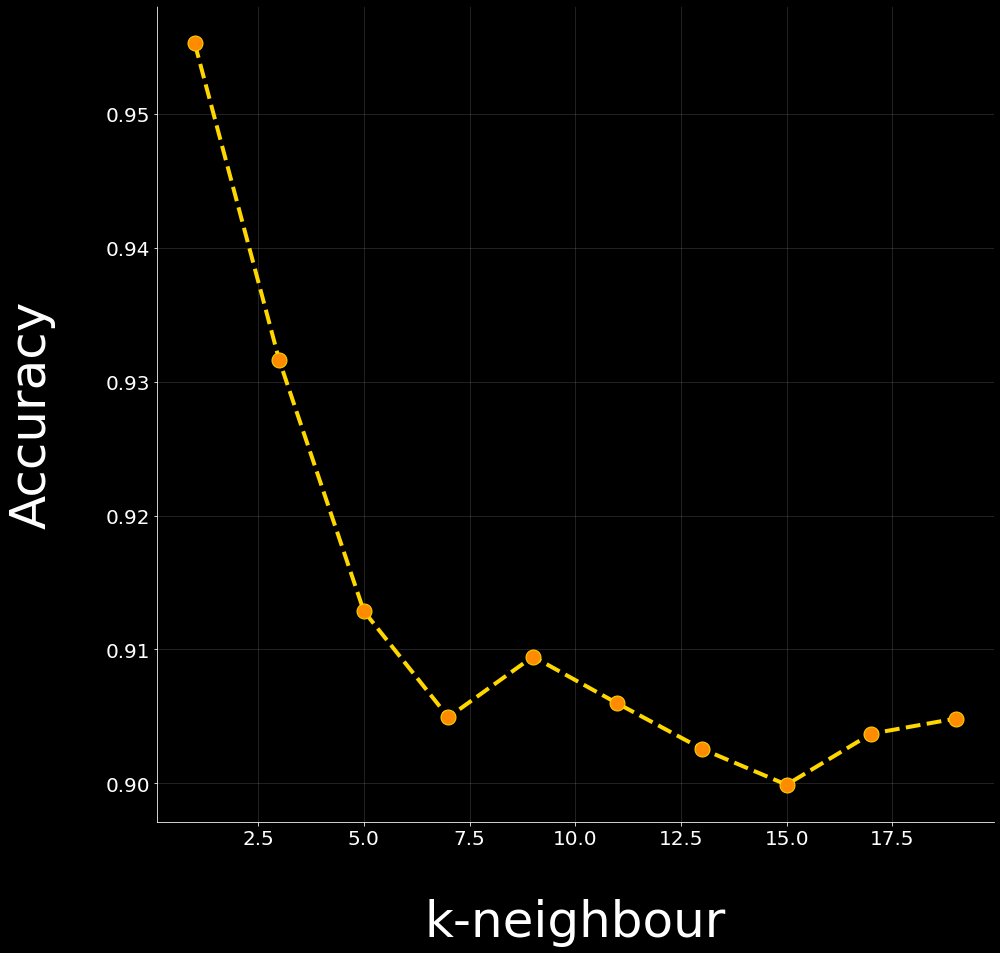

In [27]:
plot_line([el[0] for el in accuracies],[el[1] for el in accuracies], "k-neighbour", "Accuracy")

# Logistic Regression

In [ ]:
accuracies = []

for degree in tqdm(range(1,5)):
    
    c_scores = []
    
    for c in [0.01,0.1,1,10,100]:
    
        kfold = KFold(n_splits=10, random_state=123, shuffle=True)

        model = LogisticRegression(solver="newton-cg", n_jobs=-1)

        sfs_kn = sfs(estimator = model, k_features=f, cv=kfold, n_jobs=-1)

        poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)

        X_res_poly = poly.fit_transform(X_res)

        sfs_kn.fit(X_res_poly, y_res)

        temp_X_res_poly = sfs_kn.transform(X_res)

        scores = cross_val_score(model, temp_X_res_poly, y_res, scoring='accuracy', cv=kfold, n_jobs=-1)

        c_scores.append((np.mean(scores), c, temp_X_res_poly.shape[1]))      
    
    
    accuracies.append(max(c_scores, key=y=lambda e: e[0])[0], max(c_scores, key=lambda e: e[0])[1])

In [ ]:
plot_line([el[0] for el in accuracies],[el[1] for el in accuracies], "degree", "Accuracy")

# tests


In [ ]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

model = LogisticRegression(solver="newton-cg", n_jobs=-1)



poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)

X_res_poly = poly.fit_transform(X_res)


sfs_kn = SFS(estimator = model, k_features=(3, X_res_poly.shape[1]), cv=kfold, n_jobs=-1)

sfs_kn.fit(X_res_poly, y_res)

temp_X_res_poly = sfs_kn.transform(X_res_poly)

scores = cross_val_score(model, temp_X_res_poly, y_res, scoring='accuracy', cv=kfold, n_jobs=-1)


np.mean(scores)

    
